In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("local_weatherChennai.csv", index_col="time")
prophetweather = pd.read_csv("local_weatherChennai.csv")
weather

tavg  tmin  tmax  prcp
time                              
01-01-1990  25.2  22.8  28.4   0.5
02-01-1990  24.9  21.7  29.1   0.0
03-01-1990  25.6  21.4  29.8   0.0
04-01-1990  25.7   NaN  28.7   0.0
05-01-1990  25.5  20.7  28.4   0.0
...          ...   ...   ...   ...
21-07-2022  28.4  24.5  32.8  21.1
22-07-2022  27.8  24.6  32.2  22.1
23-07-2022  27.4  24.7  32.6  18.6
24-07-2022  27.8  25.0  33.3   9.1
25-07-2022  28.1  25.4  32.6   2.9

[11894 rows x 4 columns]

In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.002270
tmin    0.259290
tmax    0.085673
prcp    0.410795
dtype: float64

In [4]:
weather["prcp"] = weather["prcp"].fillna(0)
weather = weather.fillna(method="bfill")

In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
dtype: float64

In [6]:
weather.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [7]:
weather.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

In [8]:
weather.index = pd.to_datetime(weather.index)

/tmp/ipykernel_48048/3965993623.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  weather.index = pd.to_datetime(weather.index)


In [9]:
weather.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25'],
              dtype='datetime64[ns]', name='time', length=11894, freq=None)

<Axes: xlabel='time'>

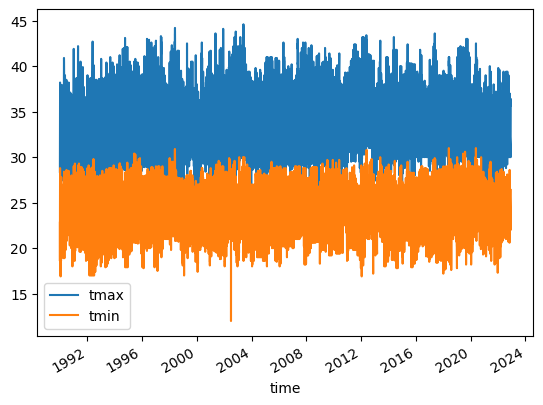

In [10]:
weather[["tmax", "tmin"]].plot()

<Axes: xlabel='time'>

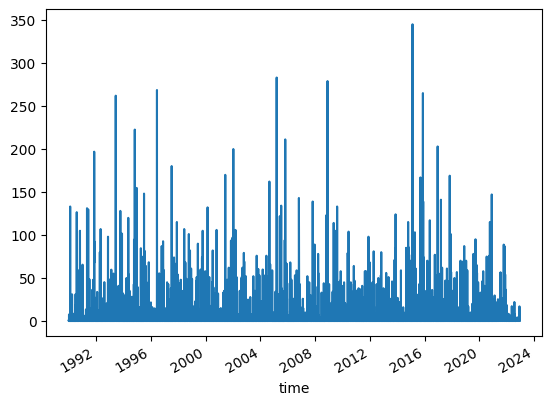

In [11]:
weather["prcp"].plot()

In [12]:
weather["target"] = weather.shift(-1)["tmax"]


In [13]:
weather

tavg  tmin  tmax  prcp  target
time                                      
1990-01-01  25.2  22.8  28.4   0.5    29.1
1990-02-01  24.9  21.7  29.1   0.0    29.8
1990-03-01  25.6  21.4  29.8   0.0    28.7
1990-04-01  25.7  20.7  28.7   0.0    28.4
1990-05-01  25.5  20.7  28.4   0.0    26.1
...          ...   ...   ...   ...     ...
2022-07-21  28.4  24.5  32.8  21.1    32.2
2022-07-22  27.8  24.6  32.2  22.1    32.6
2022-07-23  27.4  24.7  32.6  18.6    33.3
2022-07-24  27.8  25.0  33.3   9.1    32.6
2022-07-25  28.1  25.4  32.6   2.9     NaN

[11894 rows x 5 columns]

In [14]:
weather = weather.iloc[:-1,:].copy()

In [15]:
weather

tavg  tmin  tmax  prcp  target
time                                      
1990-01-01  25.2  22.8  28.4   0.5    29.1
1990-02-01  24.9  21.7  29.1   0.0    29.8
1990-03-01  25.6  21.4  29.8   0.0    28.7
1990-04-01  25.7  20.7  28.7   0.0    28.4
1990-05-01  25.5  20.7  28.4   0.0    26.1
...          ...   ...   ...   ...     ...
2022-07-20  28.9  26.2  33.0   9.3    32.8
2022-07-21  28.4  24.5  32.8  21.1    32.2
2022-07-22  27.8  24.6  32.2  22.1    32.6
2022-07-23  27.4  24.7  32.6  18.6    33.3
2022-07-24  27.8  25.0  33.3   9.1    32.6

[11893 rows x 5 columns]

In [16]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [17]:
predictors = ["prcp", "tmax", "tmin"]

In [18]:
train = weather.loc[:"2020-12-31"]
test = weather.loc["2021-01-01":]

In [19]:
train

tavg  tmin  tmax  prcp  target
time                                      
1990-01-01  25.2  22.8  28.4   0.5    29.1
1990-02-01  24.9  21.7  29.1   0.0    29.8
1990-03-01  25.6  21.4  29.8   0.0    28.7
1990-04-01  25.7  20.7  28.7   0.0    28.4
1990-05-01  25.5  20.7  28.4   0.0    26.1
...          ...   ...   ...   ...     ...
2020-12-27  25.9  21.5  30.0   0.0    30.0
2020-12-28  26.5  21.0  30.0   0.0    30.0
2020-12-29  27.1  23.4  30.0   0.0    29.4
2020-12-30  27.2  24.0  29.4   0.0    30.0
2020-12-31  27.1  25.0  30.0   0.0    30.0

[11323 rows x 5 columns]

In [20]:
test

tavg  tmin  tmax  prcp  target
time                                      
2021-01-01  26.6  21.5  30.0   0.0    25.4
2021-02-01  24.1  23.1  25.4  23.3    27.8
2021-03-01  25.3  23.3  27.8   3.1    28.6
2021-04-01  25.2  22.7  28.6   2.8    26.8
2021-05-01  24.5  23.6  26.8  22.6    28.6
...          ...   ...   ...   ...     ...
2022-07-20  28.9  26.2  33.0   9.3    32.8
2022-07-21  28.4  24.5  32.8  21.1    32.2
2022-07-22  27.8  24.6  32.2  22.1    32.6
2022-07-23  27.4  24.7  32.6  18.6    33.3
2022-07-24  27.8  25.0  33.3   9.1    32.6

[570 rows x 5 columns]

In [21]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [22]:
predictions = reg.predict(test[predictors])

In [23]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

1.295799840784785

In [24]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [25]:
combined

actual  predictions
time                           
2021-01-01    25.4    30.215658
2021-02-01    27.8    26.814599
2021-03-01    28.6    28.759209
2021-04-01    26.8    29.300585
2021-05-01    28.6    28.043336
...            ...          ...
2022-07-20    32.8    33.532248
2022-07-21    32.2    33.086799
2022-07-22    32.6    32.618881
2022-07-23    33.3    32.954802
2022-07-24    32.6    33.557860

[570 rows x 2 columns]

<Axes: xlabel='time'>

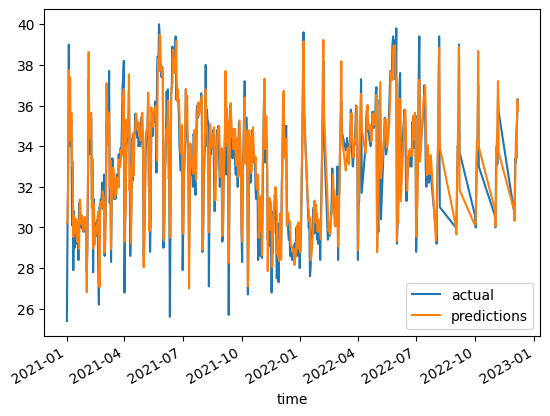

In [26]:
combined.plot()

In [27]:
reg.coef_

array([0.00222936, 0.81387154, 0.18175371])

In [28]:
def create_predictions(predictors,weather,reg):
  train = weather.loc[:"2020-12-31"]
  test = weather.loc["2021-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_squared_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error,combined

In [29]:
weather["month_day_max"] = weather["tavg"] / weather["tmax"]

weather["max_min"] = weather["tmax"] / weather["tmin"]

In [30]:
predictors = ["prcp", "tmax", "tmin", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, weather, reg)
error

1.2275801411658134

<Axes: xlabel='time'>

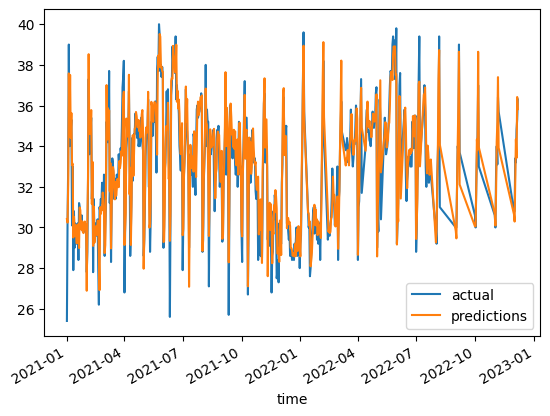

In [31]:
combined.plot()

In [32]:
combined

actual  predictions
time                           
2021-01-01    25.4    30.411647
2021-02-01    27.8    26.886216
2021-03-01    28.6    28.737552
2021-04-01    26.8    29.135790
2021-05-01    28.6    27.970203
...            ...          ...
2022-07-20    32.8    33.652032
2022-07-21    32.2    33.137770
2022-07-22    32.6    32.593252
2022-07-23    33.3    32.754249
2022-07-24    32.6    33.344621

[570 rows x 2 columns]

In [33]:
weekpredict = combined.iloc[:30]

In [34]:
weekpredict

actual  predictions
time                           
2021-01-01    25.4    30.411647
2021-02-01    27.8    26.886216
2021-03-01    28.6    28.737552
2021-04-01    26.8    29.135790
2021-05-01    28.6    27.970203
2021-06-01    29.0    29.286790
2021-07-01    27.9    29.618937
2021-08-01    28.8    28.841459
2021-09-01    29.3    29.438826
2021-10-01    29.8    29.897615
2021-11-01    29.4    30.251007
2021-12-01    29.4    30.008640
2021-01-13    29.0    29.946961
2021-01-14    30.2    29.584787
2021-01-15    29.3    30.122128
2021-01-16    29.2    29.229788
2021-01-17    29.8    29.234364
2021-01-18    30.2    29.762256
2021-01-19    28.4    30.169246
2021-01-20    31.2    28.987614
2021-01-21    31.0    30.981361
2021-01-22    30.0    30.845222
2021-01-23    30.0    30.047154
2021-01-24    30.6    29.879048
2021-01-25    30.0    30.301288
2021-01-26    29.8    29.768218
2021-01-27    29.8    29.723071
2021-01-28    30.0    29.920452
2021-01-29    29.8    30.290876
2021-01-30    30.0    29.938754

<Axes: xlabel='time'>

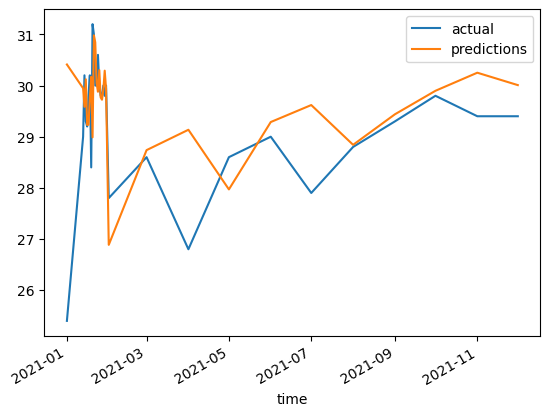

In [35]:
weekpredict.plot()

Prophet Code

In [36]:
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly


In [37]:
prophetweather.apply(pd.isnull).sum()/weather.shape[0]

time    0.000000
tavg    0.002270
tmin    0.259312
tmax    0.085681
prcp    0.410830
dtype: float64

In [38]:
prophetweather["prcp"] = prophetweather["prcp"].fillna(0)
prophetweather = prophetweather.fillna(method="bfill")

In [39]:
prophetweather.apply(pd.isnull).sum()/prophetweather.shape[0]

time    0.0
tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
dtype: float64

In [40]:
prophetweather.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [41]:
prophetweather['time'] = pd.to_datetime(prophetweather['time'])

/tmp/ipykernel_48048/2726823832.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  prophetweather['time'] = pd.to_datetime(prophetweather['time'])


In [42]:
prophetweather.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

In [43]:
prophetweather.drop(prophetweather.columns[[1,2, 4]], axis=1, inplace=True)

In [44]:
prophetweather

time  tmax
0     1990-01-01  28.4
1     1990-02-01  29.1
2     1990-03-01  29.8
3     1990-04-01  28.7
4     1990-05-01  28.4
...          ...   ...
11889 2022-07-21  32.8
11890 2022-07-22  32.2
11891 2022-07-23  32.6
11892 2022-07-24  33.3
11893 2022-07-25  32.6

[11894 rows x 2 columns]

In [45]:
training_data = prophetweather.sample(frac=0.8, random_state=25)
testing_data = prophetweather.drop(training_data.index)

In [46]:
training_data.columns = ['ds','y']
testing_data.columns = ['ds','y']

In [47]:
m = Prophet()
m.fit(training_data)

12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods=570)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot_plotly(m,forecast)

In [49]:
from statsmodels.tools.eval_measures import rmse
prophetpredict = forecast.iloc[-2379:]['yhat']
print("Root mean square error for the actual and predicted values : ",rmse(prophetpredict,testing_data['y']))
print("Mean value of test dataset : ",testing_data['y'].mean())

Root mean square error for the actual and predicted values :  3.9233769941237364
Mean value of test dataset :  33.84913829340059
